In [11]:
#Dependencies
import requests
import json
from api_keys import weather_api_key
import numpy as np
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
plt.style.use('default')

url = "http://api.openweathermap.org/data/2.5/weather?"

In [4]:
#Create variables for the random selcetion of latitudes and longitudes with limits
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create lists for holding coordinates and city names
lat_lngs = []
cities = []

# Create a set of 1200 random latitude and longitude combinations
##NB: Many of these combinations will return the same city, so more are generated to end with 
## the minimum required 500 cities

lats = np.random.uniform(low=-90.000, high=90.000, size=1400)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1400)

#Zip the lats and longs together to form coordinate pairs
lats_lngs = zip(lats, lngs)

#Loop through the list, using citipy to locate the closest city to each coordinate set
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    cities.append(city)

In [5]:
#create a dataframe to hold city information
df = pd.DataFrame({"City Name": cities,
                   "Latitude": "",
                   "Longitude": "",
                   "Max Temp": "",
                   "Humidity": "",
                   "Cloudiness": "",
                   "Wind Speed": "",
                   "Country": "",
                   "City Date/Time": ""})

#Remove any duplicate rows based on city name
df = df.drop_duplicates(subset=["City Name"], ignore_index=True)
df

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,City Date/Time
0,narsaq,,,,,,,,
1,namatanai,,,,,,,,
2,vaini,,,,,,,,
3,keetmanshoop,,,,,,,,
4,lompoc,,,,,,,,
...,...,...,...,...,...,...,...,...,...
571,pahrump,,,,,,,,
572,trairi,,,,,,,,
573,loandjili,,,,,,,,
574,coihaique,,,,,,,,


In [6]:
# Use a for loop to build the query url from DataFrame of city names
## Use try and except functions to skip over rows with no weather information available
for index, row in df.iterrows():
    
    try:
        city = row["City Name"]
    
        query_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
        response = requests.get(query_url)
        cities_info = response.json()

        #Store the exact latitude and longitude values for each city
        df.loc[index, "Latitude"] = cities_info['coord']['lat']
        df.loc[index, "Longitude"] = cities_info['coord']['lon']
        df.loc[index, "Max Temp"] = cities_info["main"]["temp_max"]
        df.loc[index, "Humidity"] = cities_info["main"]["humidity"]
        df.loc[index, "Cloudiness"] = cities_info["clouds"]["all"]
        df.loc[index, "Wind Speed"] = cities_info["wind"]["speed"]
        df.loc[index, "Country"] = cities_info["sys"]["country"]
        df.loc[index, "City Date/Time"] = cities_info["dt"]
    
    except KeyError:
        print(f"No data available for {city}")
    
    #Print log of city as it is checked
    print(f"Checking weather at {city}, city number {index + 1}")

Checking weather at narsaq, city number 1
Checking weather at namatanai, city number 2
Checking weather at vaini, city number 3
Checking weather at keetmanshoop, city number 4
Checking weather at lompoc, city number 5
Checking weather at bluff, city number 6
Checking weather at huilong, city number 7
Checking weather at kyren, city number 8
Checking weather at puerto ayora, city number 9
Checking weather at ribeira grande, city number 10
Checking weather at caravelas, city number 11
Checking weather at klaksvik, city number 12
Checking weather at alta floresta, city number 13
Checking weather at puno, city number 14
No data available for grand river south east
Checking weather at grand river south east, city number 15
Checking weather at mar del plata, city number 16
Checking weather at yellowknife, city number 17
Checking weather at kaitangata, city number 18
No data available for tumannyy
Checking weather at tumannyy, city number 19
Checking weather at busselton, city number 20
Check

In [7]:
#Convert values from API to numerical values, in order to plot later
df["Latitude"] = pd.to_numeric(df["Latitude"], errors='coerce')
df["Longitude"] = pd.to_numeric(df["Longitude"], errors='coerce')
df["Max Temp"] = pd.to_numeric(df["Max Temp"], errors='coerce')
df["Humidity"] = pd.to_numeric(df["Humidity"], errors='coerce')
df["Cloudiness"] = pd.to_numeric(df["Cloudiness"], errors='coerce')
df["Wind Speed"] = pd.to_numeric(df["Wind Speed"], errors='coerce')

#Save dataframe as a csv
df.to_csv('../Cities_Weather_Info.csv')

#Remove rows with no weather information available
df = df.dropna()
df

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,City Date/Time
0,narsaq,60.9167,-46.0500,9.12,74.0,99.0,1.37,GL,1656134939
1,namatanai,-3.6667,152.4333,29.24,69.0,63.0,5.57,PG,1656134940
2,vaini,-21.2000,-175.2000,23.09,73.0,20.0,4.12,TO,1656134941
3,keetmanshoop,-26.5833,18.1333,4.70,83.0,0.0,1.04,NA,1656134941
4,lompoc,34.6391,-120.4579,18.08,95.0,0.0,3.09,US,1656134942
...,...,...,...,...,...,...,...,...,...
571,pahrump,36.2083,-115.9839,30.14,16.0,0.0,0.89,US,1656135213
572,trairi,-3.2778,-39.2689,22.12,95.0,44.0,2.62,BR,1656135412
573,loandjili,-4.7561,11.8578,22.06,94.0,20.0,0.51,CG,1656135413
574,coihaique,-45.5752,-72.0662,-7.03,86.0,0.0,1.03,CL,1656135120


In [8]:
#Check to see if there are any values of humidity over 100%
humid = df.loc[df['Humidity'] > 100]
humid

#Repeated trials did not pull any data for this step

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,City Date/Time


Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

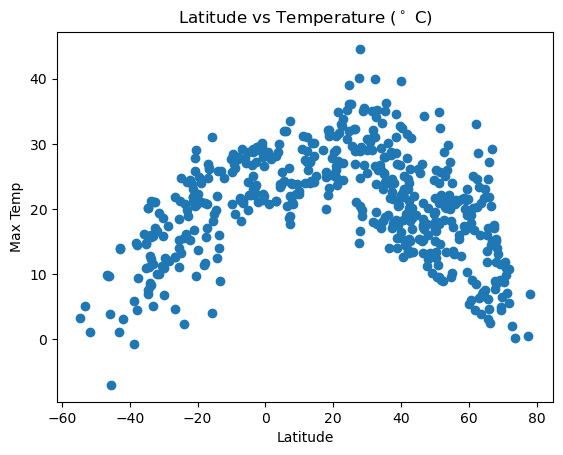

In [12]:
plt.scatter(df['Latitude'], df['Max Temp'])
plt.title("Latitude vs Temperature ($^\circ$ C)")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

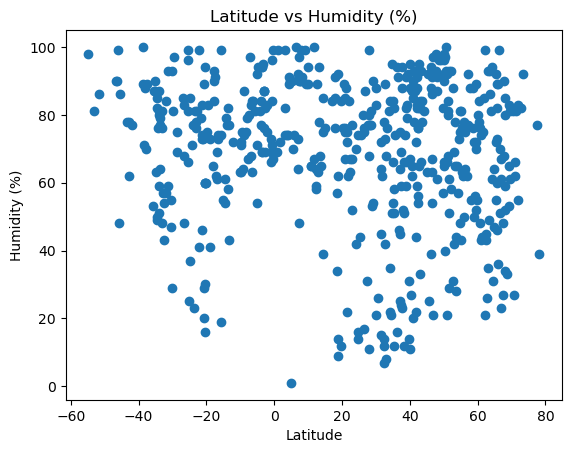

In [13]:
plt.scatter(df['Latitude'], df['Humidity'])
plt.title("Latitude vs Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

In [14]:
#Correlation coefficient calculation
correlation = st.pearsonr(df['Latitude'], df['Humidity'])
print(f"The correlation between latitude and humidity is {round(correlation[0],2)}")

The correlation between latitude and humidity is -0.13


Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

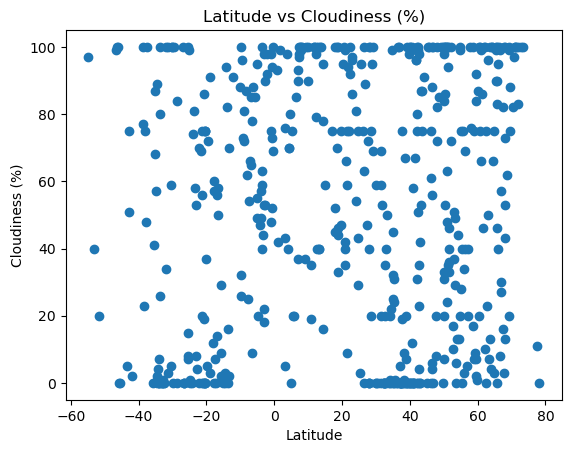

In [15]:
plt.scatter(df['Latitude'], df['Cloudiness'])
plt.title("Latitude vs Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")


Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Latitude')

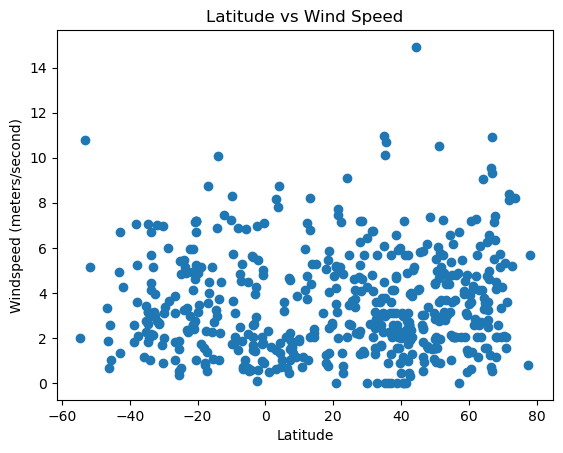

In [16]:
plt.scatter(df['Latitude'], df['Wind Speed'])
plt.title("Latitude vs Wind Speed")
plt.ylabel("Windspeed (meters/second)")
plt.xlabel("Latitude")

Linear Regression

In [17]:
#Create separate dataframes for northern and southern hemispheres
northern_hemisphere = df.loc[df['Latitude'] >= 0]
southern_hemisphere = df.loc[df['Latitude'] < 0]

Text(10, -10, 'y = -0.26x + 31.87')

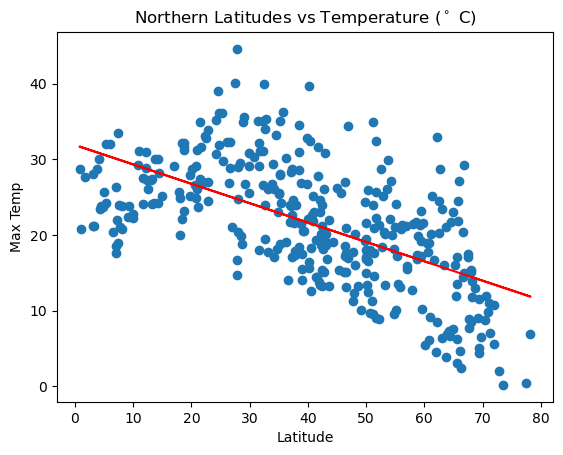

In [19]:
#Calculate the linear regression model
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the chart
plt.scatter(northern_hemisphere['Latitude'], northern_hemisphere['Max Temp'])
plt.title("Northern Latitudes vs Temperature ($^\circ$ C)")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")

Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(-40, 5, 'y = 0.44x + 27.55')

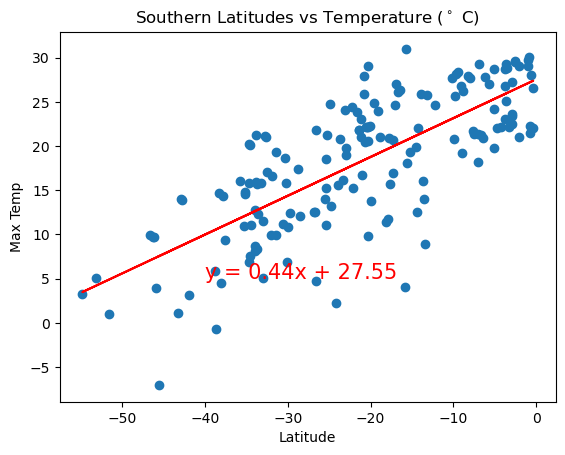

In [21]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere['Latitude'], southern_hemisphere['Max Temp'])
plt.title("Southern Latitudes vs Temperature ($^\circ$ C)")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,5),fontsize=15,color="red")


Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(45, 6, 'y = -0.09x + 70.32')

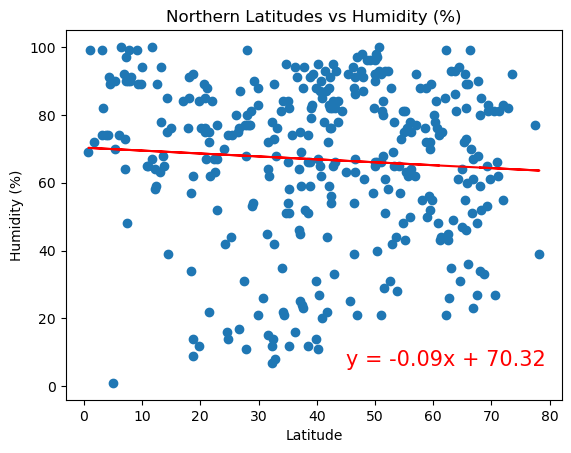

In [22]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemisphere['Latitude'], northern_hemisphere['Humidity'])
plt.title("Northern Latitudes vs Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,6),fontsize=15,color="red")

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(-55, 30, 'y = 0.05x + 73.41')

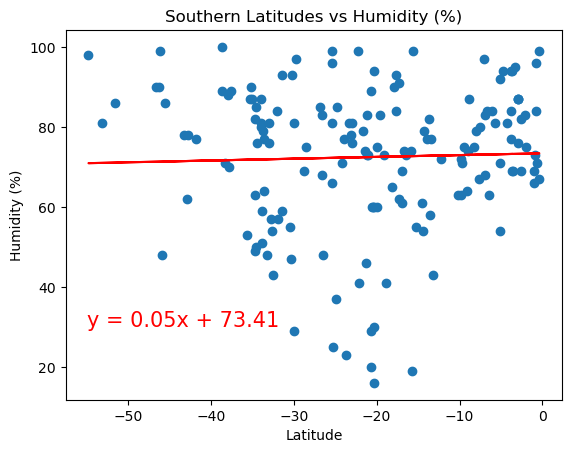

In [23]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere['Latitude'], southern_hemisphere['Humidity'])
plt.title("Southern Latitudes vs Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.08x + 56.24


Text(45, 10, 'y = -0.08x + 56.24')

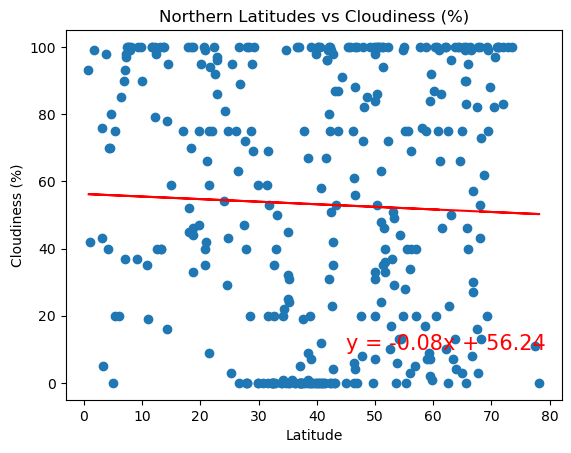

In [24]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(northern_hemisphere['Latitude'], northern_hemisphere['Cloudiness'])
plt.title("Northern Latitudes vs Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(-55, 45, 'y = 0.55x + 57.28')

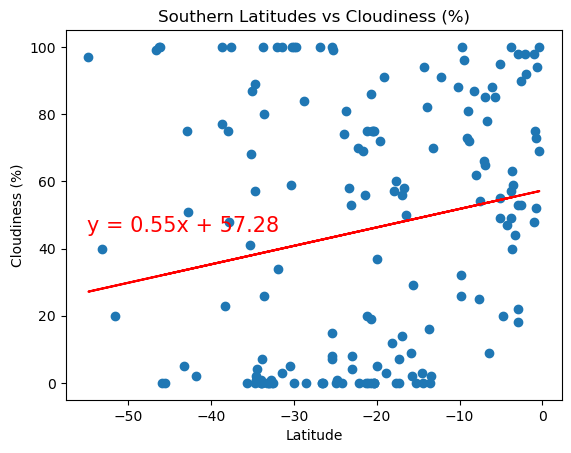

In [25]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere['Latitude'], southern_hemisphere['Cloudiness'])
plt.title("Southern Latitudes vs Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,45),fontsize=15,color="red")

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(45, 10, 'y = 0.01x + 2.91')

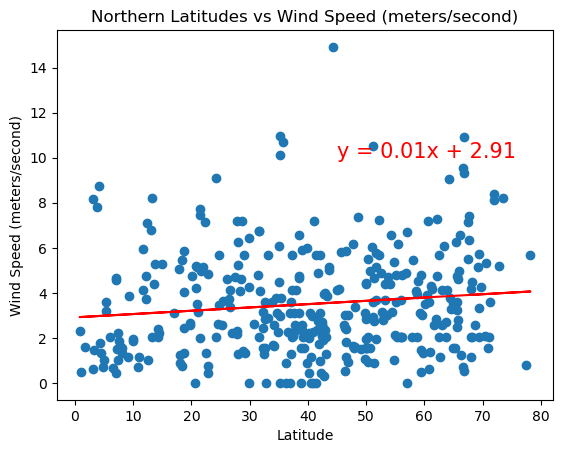

In [26]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemisphere['Latitude'], northern_hemisphere['Wind Speed'])
plt.title("Northern Latitudes vs Wind Speed (meters/second)")
plt.ylabel("Wind Speed (meters/second)")
plt.xlabel("Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(-55, 10, 'y = -0.01x + 3.3')

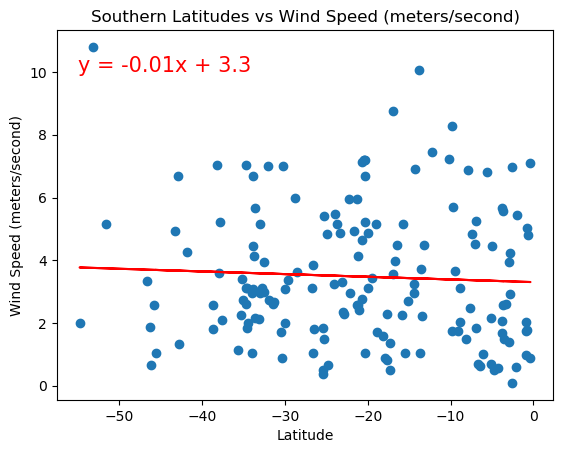

In [27]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere['Latitude'], southern_hemisphere['Wind Speed'])
plt.title("Southern Latitudes vs Wind Speed (meters/second)")
plt.ylabel("Wind Speed (meters/second)")
plt.xlabel("Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")